In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [4]:
fof = fetch_olivetti_faces()

In [7]:
X = fof['data']
images = fof['images']
y = fof['target']

In [112]:
X.shape, images.shape

((400, 4096), (400, 64, 64))

In [116]:
images[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

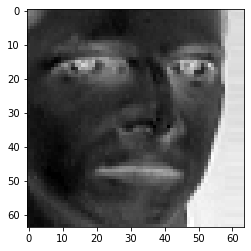

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(images[1], cmap='binary')

In [18]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      random_state=42,
                                                      stratify=y,
                                                      test_size=0.4
                                                     )

In [32]:
y_valid

array([36, 26, 13, 10, 34, 28,  7, 14, 28, 39, 12,  0, 39, 37, 32, 35, 32,
       20, 21, 34, 32, 26,  5, 29, 29, 28, 19, 23, 11,  8,  6, 30, 33, 18,
       37,  5, 29, 33, 25, 16,  2,  2, 14,  5, 19, 19, 20, 37,  3,  3, 12,
       10, 31,  4, 21, 23,  8, 25, 38,  2, 15, 23,  3,  5, 11, 27, 38,  7,
       21, 10, 26,  1, 35,  8, 13, 34, 15, 39, 19,  0,  0, 22, 24, 17,  4,
       31, 30, 25, 16, 23, 24, 22, 36, 22, 33, 13, 15, 38,  7, 17,  8,  0,
       11, 22, 17, 31, 38, 16,  1, 35,  9,  9,  7,  1, 16,  6, 12, 32, 33,
        9,  3, 11,  1, 25, 39, 26, 14, 18, 36, 37, 18, 30, 10, 27,  9, 14,
       13, 30,  6, 24, 17, 29, 27, 20, 12, 31,  6,  2, 18, 36, 34, 24,  4,
       35, 21, 27, 20, 15, 28,  4])

In [33]:
import numpy as np
values, counts = np.unique(y_train, return_counts=True)
print(values, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6]


In [35]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid,
                                                      random_state=42,
                                                      stratify=y_valid,
                                                      test_size=0.5)
values, counts = np.unique(y_test, return_counts=True)
print(values, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [36]:
values, counts = np.unique(y_valid, return_counts=True)
print(values, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [84]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(240, 4096) (240,)
(80, 4096) (80,)
(80, 4096) (80,)


In [86]:
from sklearn.decomposition import PCA

pca = PCA(0.99, random_state=42, )
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

177

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [103]:
import warnings
warnings.filterwarnings('ignore')
i=0
scores=[]
k_range = range(5, 150, 5)
kmeans_per_k = []
inertias = []
for k in k_range:
    kmeans = KMeans(algorithm='full', n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_train_pca)
    centers = kmeans.cluster_centers_
    score = silhouette_score(X_train_pca, preds)
    scores.append(score)
    inertias.append(kmeans.inertia_)
    kmeans_per_k.append(kmeans)

    i=i+1


In [80]:
kmeans.inertia_

12898.2783203125

In [95]:
np.argmax(scores)

20

In [97]:
scores[20], k_range[20]

(0.21647167, 105)

In [104]:
best_index = np.argmax(scores)
best_k = k_range[best_index]
best_score = scores[best_index]
best_inertia = inertias[best_index]

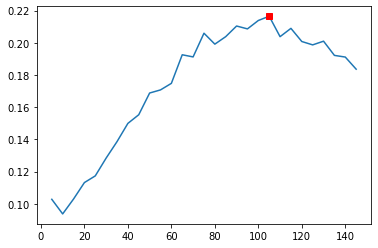

In [101]:
plt.plot(k_range, scores)
plt.plot(best_k, best_score, "rs")

In [107]:
best_model = kmeans_per_k[best_index]

In [108]:
best_model.labels_

array([  7,  56,  37,   7,  22,   4,  68,  20,   7,  23,  23,   4,  87,
        51,  22,  64,  82,  40,  11,   5,  26,  69,  49,   8,  73,  28,
        24,  41,  42,  50,  69,   4,  72,   6,   0,  45,  38,  84,  16,
         2,  53,  80,   0,   8,  82,  13,   8,  49,  63,  29,  98,  69,
        91,  37,  37,  85,  12,   3,  99,  38,  10,  68,  62,  13,  27,
        79,  17,  78,  93,  34,  52,  71,  68,  75,  58,  32,   0,  53,
        34,  82,  41,  88,  13,  59,  80,  74,  81,  54,  16,   4,  75,
       104,  67,  26,   4,  48,  12,  79,  96,   1,  79,  44,  35,  18,
        88,  86,  26,   9, 100,  39,  37,  20,  42,  30,  70,  13,  14,
         1,  61,  55,  46,  94,  41,  66,   9,   3,  32,  78,  42,  16,
        76, 101,  90,  58,  22,   3,  19,   2,   1,  36,  59,  51,  15,
        52,  14,   3,  22, 103,  22,   2,  31,  47,  43,  83,  56,  64,
        56,  90,  25,  19,  37,  46,  97,  27,  31,  47,  62,  86,  38,
        15,  77,  39,  77,  53,  41,   9,  35,  74,  60,  36,  8

Cluster 0


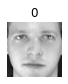

Cluster 1


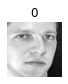

Cluster 2


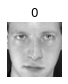

Cluster 3


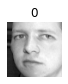

Cluster 4


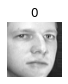

Cluster 5


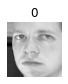

Cluster 6


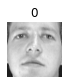

Cluster 7


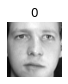

Cluster 8


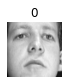

Cluster 9


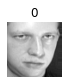

Cluster 10


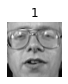

Cluster 11


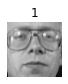

Cluster 12


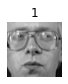

Cluster 13


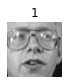

Cluster 14


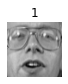

Cluster 15


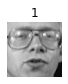

Cluster 16


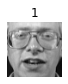

Cluster 17


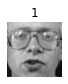

Cluster 18


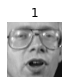

Cluster 19


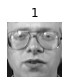

Cluster 20


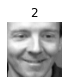

Cluster 21


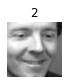

Cluster 22


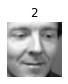

Cluster 23


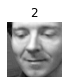

Cluster 24


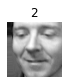

Cluster 25


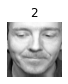

Cluster 26


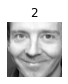

Cluster 27


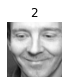

Cluster 28


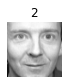

Cluster 29


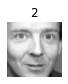

Cluster 30


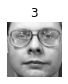

Cluster 31


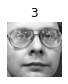

Cluster 32


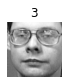

Cluster 33


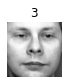

Cluster 34


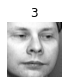

Cluster 35


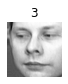

Cluster 36


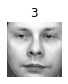

Cluster 37


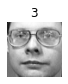

Cluster 38


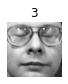

Cluster 39


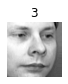

Cluster 40


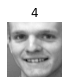

Cluster 41


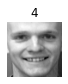

Cluster 42


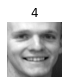

Cluster 43


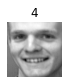

Cluster 44


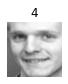

Cluster 45


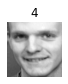

Cluster 46


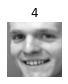

Cluster 47


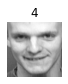

Cluster 48


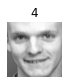

Cluster 49


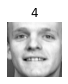

Cluster 50


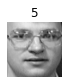

Cluster 51


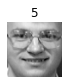

Cluster 52


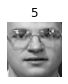

Cluster 53


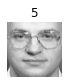

Cluster 54


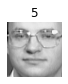

Cluster 55


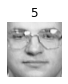

Cluster 56


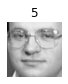

Cluster 57


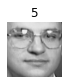

Cluster 58


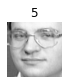

Cluster 59


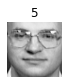

Cluster 60


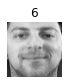

Cluster 61


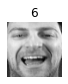

Cluster 62


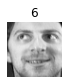

Cluster 63


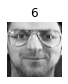

Cluster 64


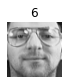

Cluster 65


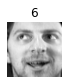

Cluster 66


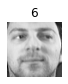

Cluster 67


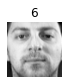

Cluster 68


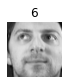

Cluster 69


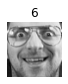

Cluster 70


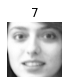

Cluster 71


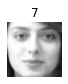

Cluster 72


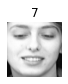

Cluster 73


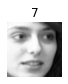

Cluster 74


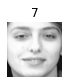

Cluster 75


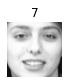

Cluster 76


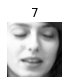

Cluster 77


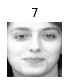

Cluster 78


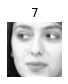

Cluster 79


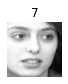

Cluster 80


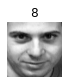

Cluster 81


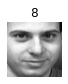

Cluster 82


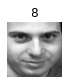

Cluster 83


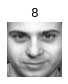

Cluster 84


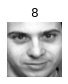

Cluster 85


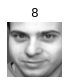

Cluster 86


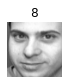

Cluster 87


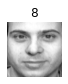

Cluster 88


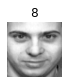

Cluster 89


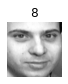

Cluster 90


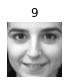

Cluster 91


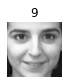

Cluster 92


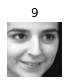

Cluster 93


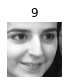

Cluster 94


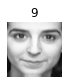

Cluster 95


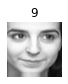

Cluster 96


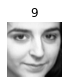

Cluster 97


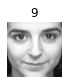

Cluster 98


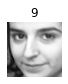

Cluster 99


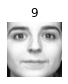

Cluster 100


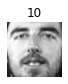

Cluster 101


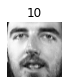

Cluster 102


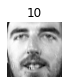

Cluster 103


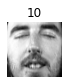

Cluster 104


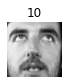

In [131]:
def plot_faces(images, y, index):
    plt.figure(figsize=(1,1))
    plt.imshow(images[index], cmap='gray')
    plt.axis("off")
    plt.title(y[index])

    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    plot_faces(images, y,cluster_id)


Cluster 0


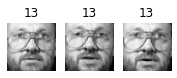

Cluster 1


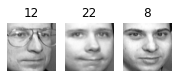

Cluster 2


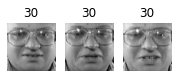

Cluster 3


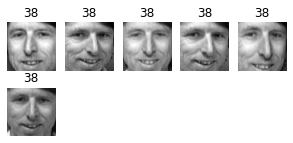

Cluster 4


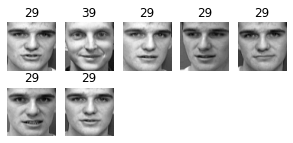

Cluster 5


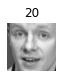

Cluster 6


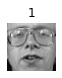

Cluster 7


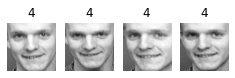

Cluster 8


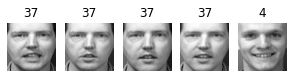

Cluster 9


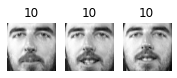

Cluster 10


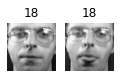

Cluster 11


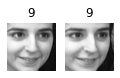

Cluster 12


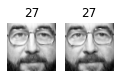

Cluster 13


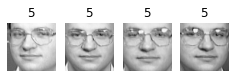

Cluster 14


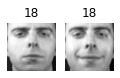

Cluster 15


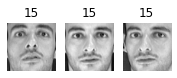

Cluster 16


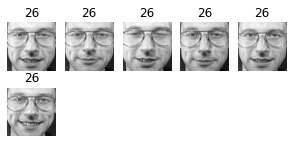

Cluster 17


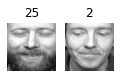

Cluster 18


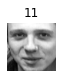

Cluster 19


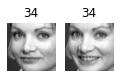

Cluster 20


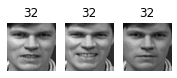

Cluster 21


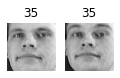

Cluster 22


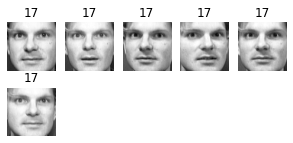

Cluster 23


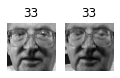

Cluster 24


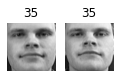

Cluster 25


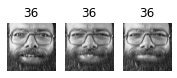

Cluster 26


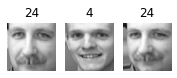

Cluster 27


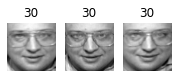

Cluster 28


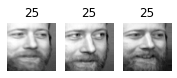

Cluster 29


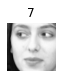

Cluster 30


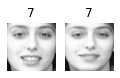

Cluster 31


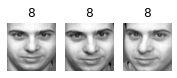

Cluster 32


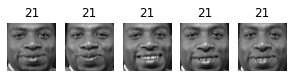

Cluster 33


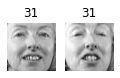

Cluster 34


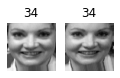

Cluster 35


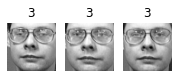

Cluster 36


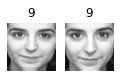

Cluster 37


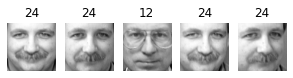

Cluster 38


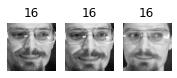

Cluster 39


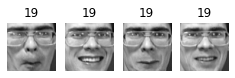

Cluster 40


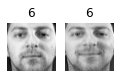

Cluster 41


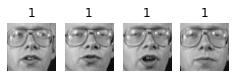

Cluster 42


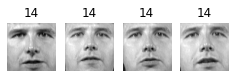

Cluster 43


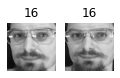

Cluster 44


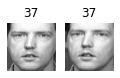

Cluster 45


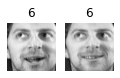

Cluster 46


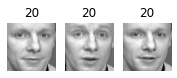

Cluster 47


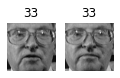

Cluster 48


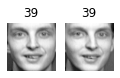

Cluster 49


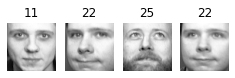

Cluster 50


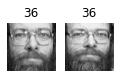

Cluster 51


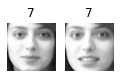

Cluster 52


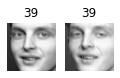

Cluster 53


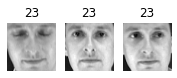

Cluster 54


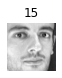

Cluster 55


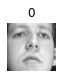

Cluster 56


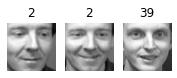

Cluster 57


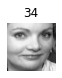

Cluster 58


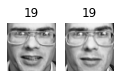

Cluster 59


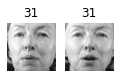

Cluster 60


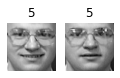

Cluster 61


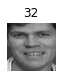

Cluster 62


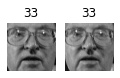

Cluster 63


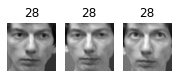

Cluster 64


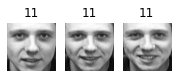

Cluster 65


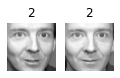

Cluster 66


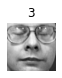

Cluster 67


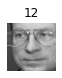

Cluster 68


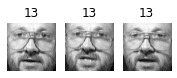

Cluster 69


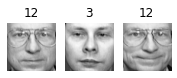

Cluster 70


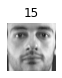

Cluster 71


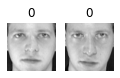

Cluster 72


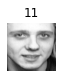

Cluster 73


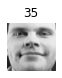

Cluster 74


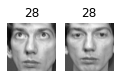

Cluster 75


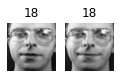

Cluster 76


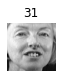

Cluster 77


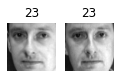

Cluster 78


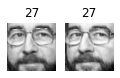

Cluster 79


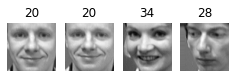

Cluster 80


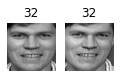

Cluster 81


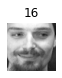

Cluster 82


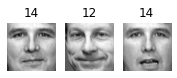

Cluster 83


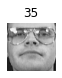

Cluster 84


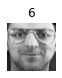

Cluster 85


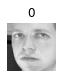

Cluster 86


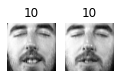

Cluster 87


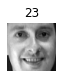

Cluster 88


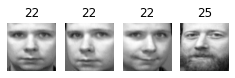

Cluster 89


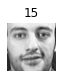

Cluster 90


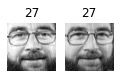

Cluster 91


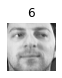

Cluster 92


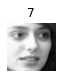

Cluster 93


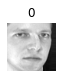

Cluster 94


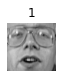

Cluster 95


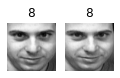

Cluster 96


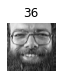

Cluster 97


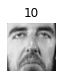

Cluster 98


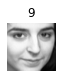

Cluster 99


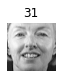

Cluster 100


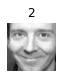

Cluster 101


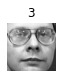

Cluster 102


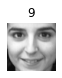

Cluster 103


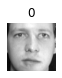

Cluster 104


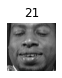

In [132]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

# ---------------------------------------

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [139]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
pred = lr.predict(X_valid_pca)
lr.score(X_valid_pca, y_valid)

#accuracy_score(y_valid, pred)

0.9375

In [136]:
best_model

KMeans(algorithm='full', n_clusters=105, random_state=42)

In [141]:
X_train_red = best_model.transform(X_train_pca)
X_valid_red = best_model.transform(X_valid_pca)
X_test_red = best_model.transform(X_test_pca)

lr.fit(X_train_red, y_train)
lr.score(X_valid_red, y_valid)

0.8625

In [144]:
from sklearn.pipeline import Pipeline

In [149]:
k_range = list(range(5,150,5))
scores=[]

for k in k_range:
    pp = Pipeline([
        ('Kmeans', KMeans(algorithm='full', n_clusters=k, random_state=42)),
        ('Logistic Regression', LogisticRegression())
    ])
    pp.fit(X_train_pca, y_train)
    print(k, pp.score(X_valid_pca, y_valid))
    scores.append(pp.score(X_valid_pca, y_valid))
    

5 0.35
10 0.55
15 0.6375
20 0.7625
25 0.75
30 0.7625
35 0.8
40 0.75
45 0.8
50 0.7875
55 0.7875
60 0.8125
65 0.8375
70 0.8
75 0.8625
80 0.8625
85 0.8125
90 0.825
95 0.8
100 0.8125
105 0.8375
110 0.825
115 0.825
120 0.8375
125 0.85
130 0.8875
135 0.875
140 0.85
145 0.8875


In [154]:
best_score_index = np.argmax(scores)
best_score = scores[best_score_index]
best_k = k_range[best_score_index]
best_score, best_k

(0.8875, 130)

In [156]:
X_train.shape

(240, 4096)

In [157]:
X_train_red.shape

(240, 105)

In [162]:
X_train_extended = np.concatenate((X_train, X_train_red), axis=1)
X_valid_extended = np.concatenate((X_valid, X_valid_red), axis=1)
X_test_extended = np.concatenate((X_test, X_test_red), axis=1)

In [164]:
lr.fit(X_train_extended, y_train)
lr.score(X_valid_extended, y_valid)

0.875

# ----------------------------------------

In [165]:
X = fof['data']
images = fof['images']
y = fof['target']

In [166]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      random_state=42,
                                                      stratify=y,
                                                      test_size=0.4
                                                     )
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid,
                                                      random_state=42,
                                                      stratify=y_valid,
                                                      test_size=0.5)

In [168]:
from sklearn.mixture import GaussianMixture

In [178]:
GM = GaussianMixture(n_components=40, random_state=42)
GM.fit(X_train_pca, y_train)
y_pred = GM.predict(X_valid_pca)
accuracy_score(y_valid, y_pred)

0.025

In [181]:
n_samples = 20

X, y = GM.sample(n_samples)
faces = pca.inverse_transform(X)

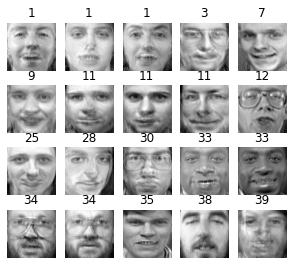

In [188]:
plot_faces(faces, y)

# -------------------------------------------

In [192]:
X_projected = pca.inverse_transform(X_train_pca)

In [202]:
loss = np.sum((X_train - X_projected) ** 2, axis=1).mean()
loss

0.77459073

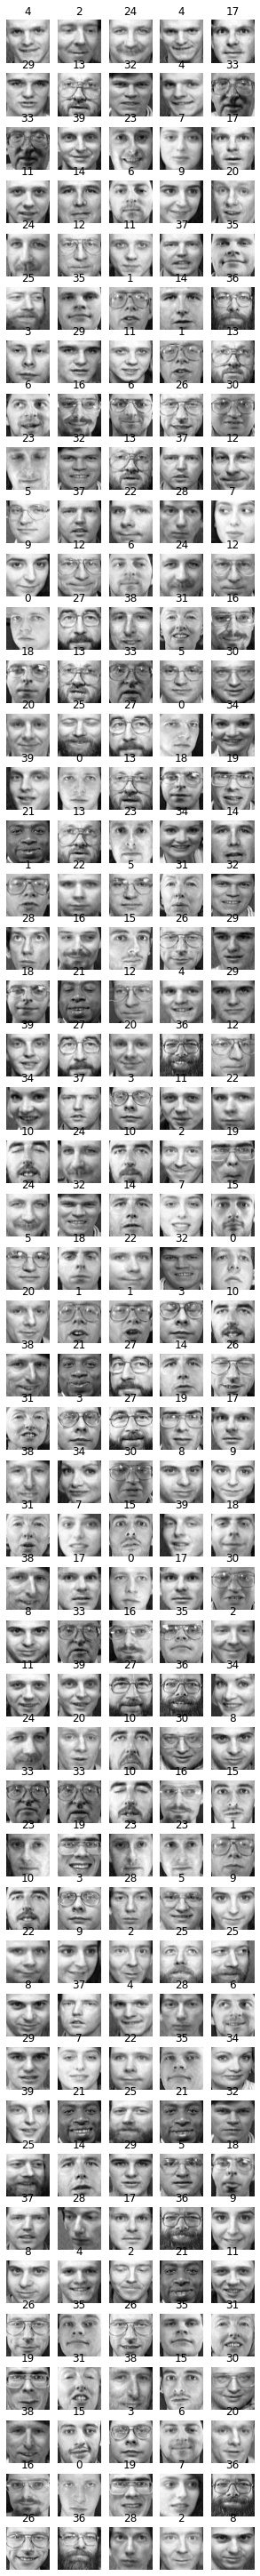

In [203]:
plot_faces(X_projected, y_train)

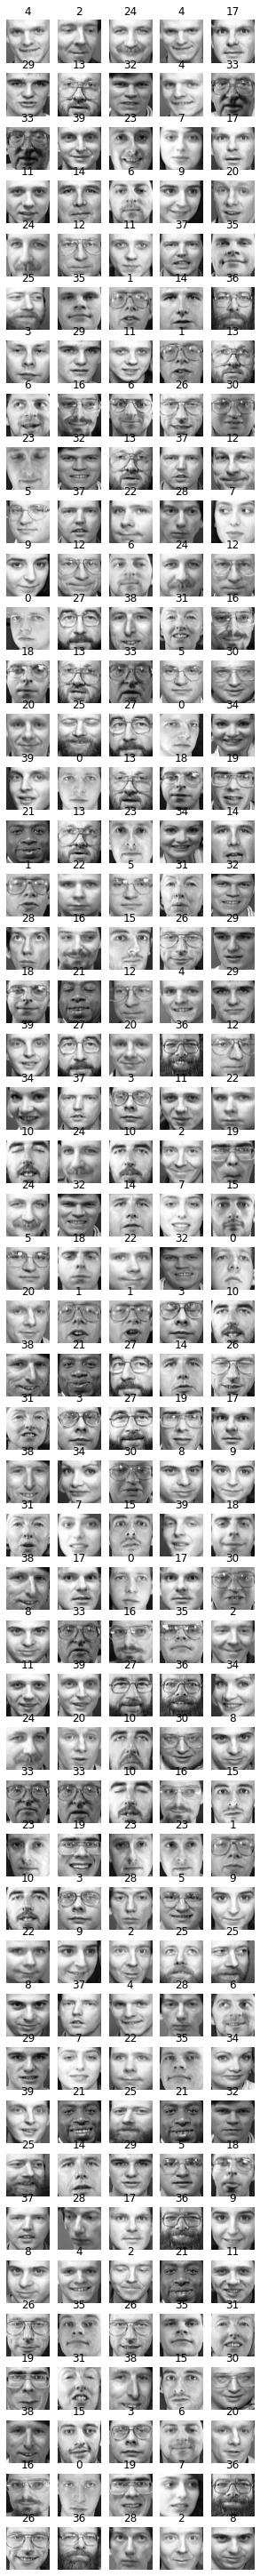

In [204]:
plot_faces(X_train, y_train)